Lets we will import all the necessary library 

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

now will extract the data from csv file by pandas library

In [2]:
data=pd.read_csv("C:\\Users\\SAI BABA\\Desktop\\micro credit defaulter project\\Data file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.shape

(209593, 37)

so total we have  209593 rows and 37 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

it gives the information about the column data type with null values in it

so again will check null values 

In [5]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

it shows there is no null values present in our data set

In [6]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


this describe the whole data set with its total count ,mean ,std along with minimum to maximum values present in the dataset of perticular column

In [7]:
data['amnt_loans30'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Name: amnt_loans30, Length: 209593, dtype: bool

now we can also represent the null values if present in the dataset by heatmap

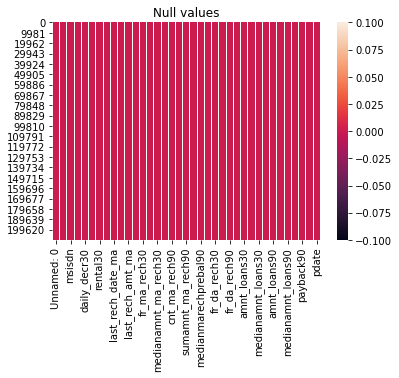

In [8]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

now as column 'Unamed:0' has no any relation with the output variable lets will delet that column

In [9]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

now will check the correlation of every column with its own and with the other column

In [10]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


we can also represent this correlation by heat map

<AxesSubplot:>

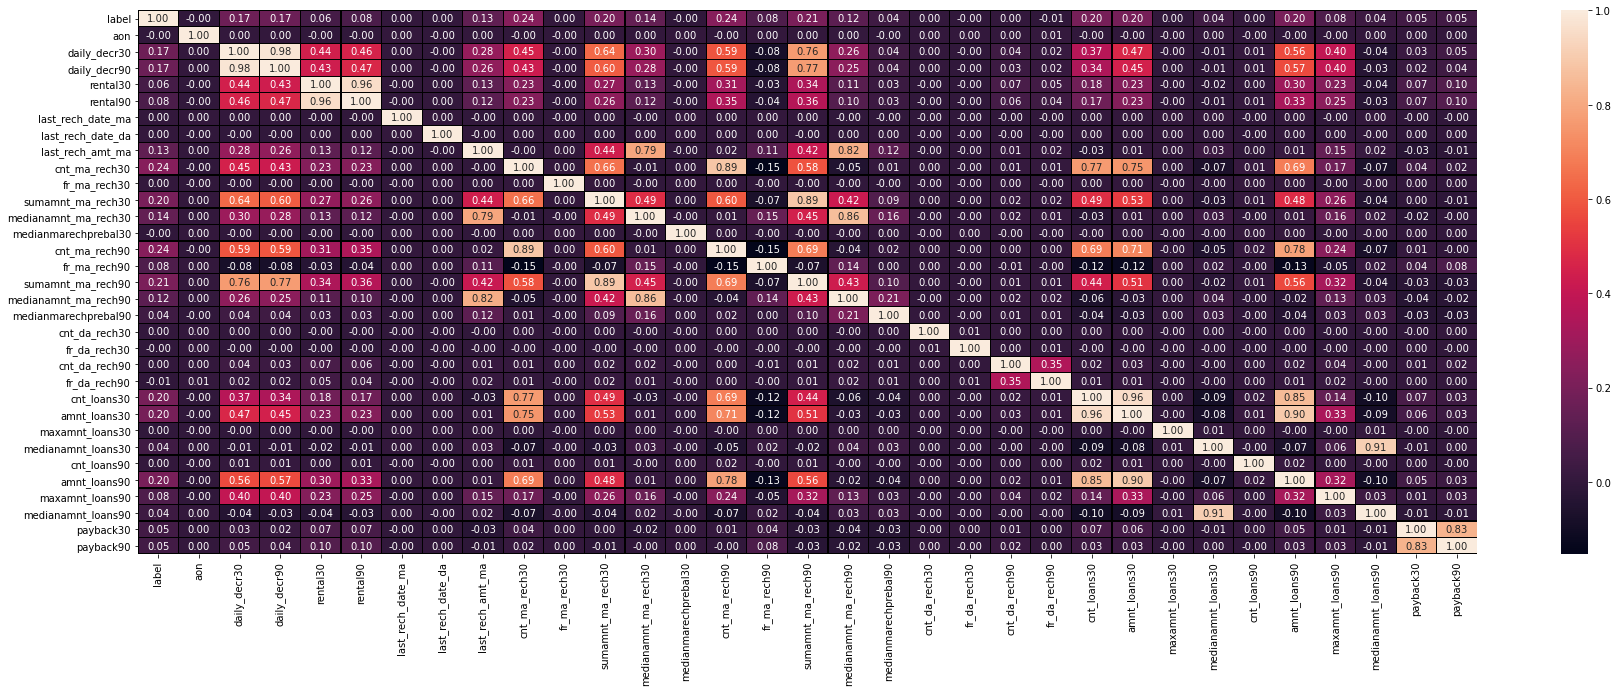

In [11]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

lets will do some label encoding of object type column for further analysis by labelencoder

# DATA ENCODING

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
label=le.fit_transform(data["msisdn"])
label
data=data.drop("msisdn",axis='columns')
data["msisdn"]=label


In [14]:
le=LabelEncoder()
label=le.fit_transform(data["pcircle"])
label
data=data.drop("pcircle",axis='columns')
data["pcircle"]=label

In [15]:
le=LabelEncoder()
label=le.fit_transform(data["pdate"])
label
data=data.drop("pdate",axis='columns')
data["pdate"]=label
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,msisdn,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,40191,0,49
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,142291,0,70
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,33594,0,79
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,104157,0,5
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6910,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,42866,0,16
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,178248,0,11
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,53995,0,58
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,111388,0,54


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

so all the columns are converted into float or int

<AxesSubplot:>

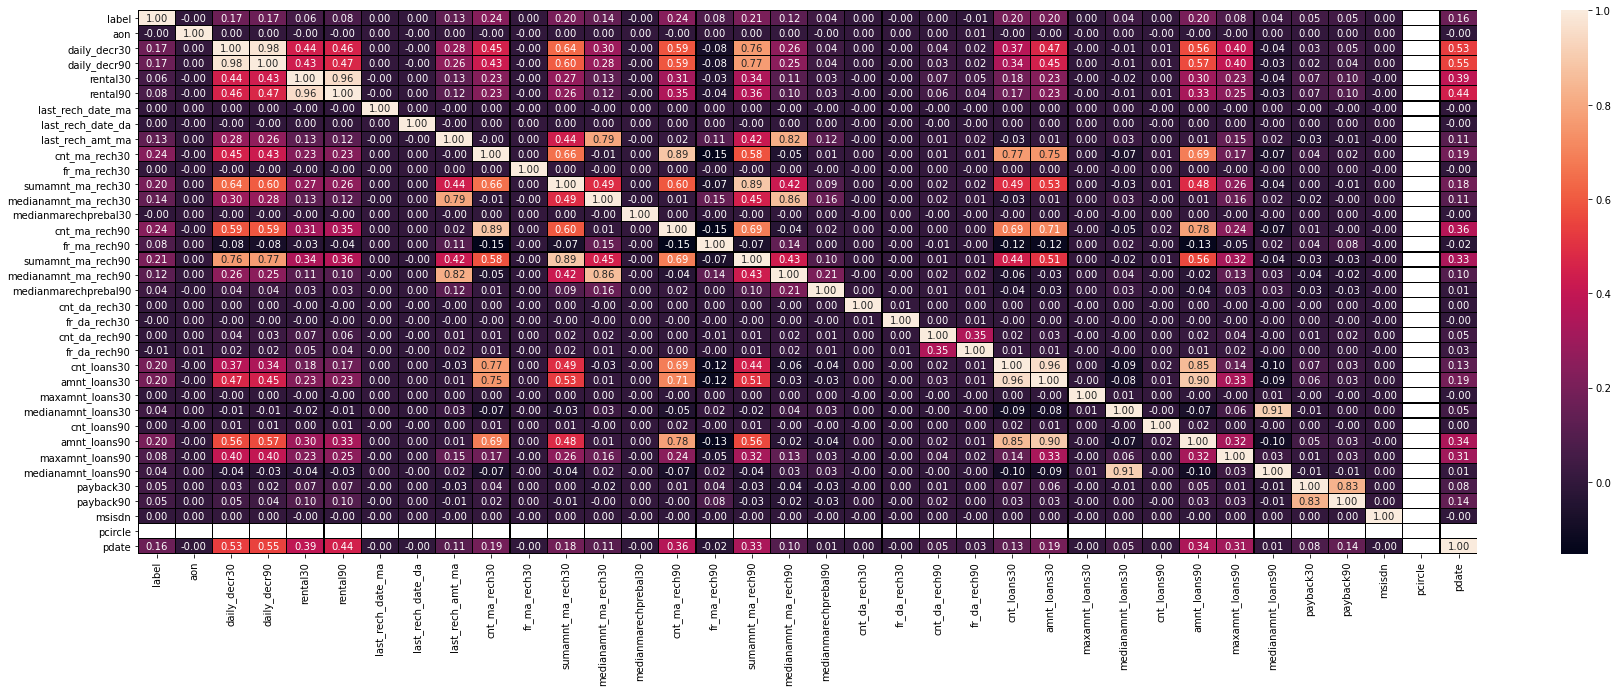

In [17]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

now from heat map it is observed that column 'pcircle'has no values and also the columns'pcircle','msisdn','cnt_loans90','maxamnt_loans30','cnt_da_rech90','fr_da_rech30','cnt_da_rech30','medianmarechprebal30','fr_ma_rech30','last_rech_date_da','last_rech_date_ma','aon' has zero correlation with the output variable or label so lets will drop that columns

In [18]:
data.drop(['pcircle','msisdn','cnt_loans90','maxamnt_loans30','cnt_da_rech90','fr_da_rech30','cnt_da_rech30','medianmarechprebal30','fr_ma_rech30','last_rech_date_da','last_rech_date_ma','aon'],axis=1,inplace=True)

<AxesSubplot:>

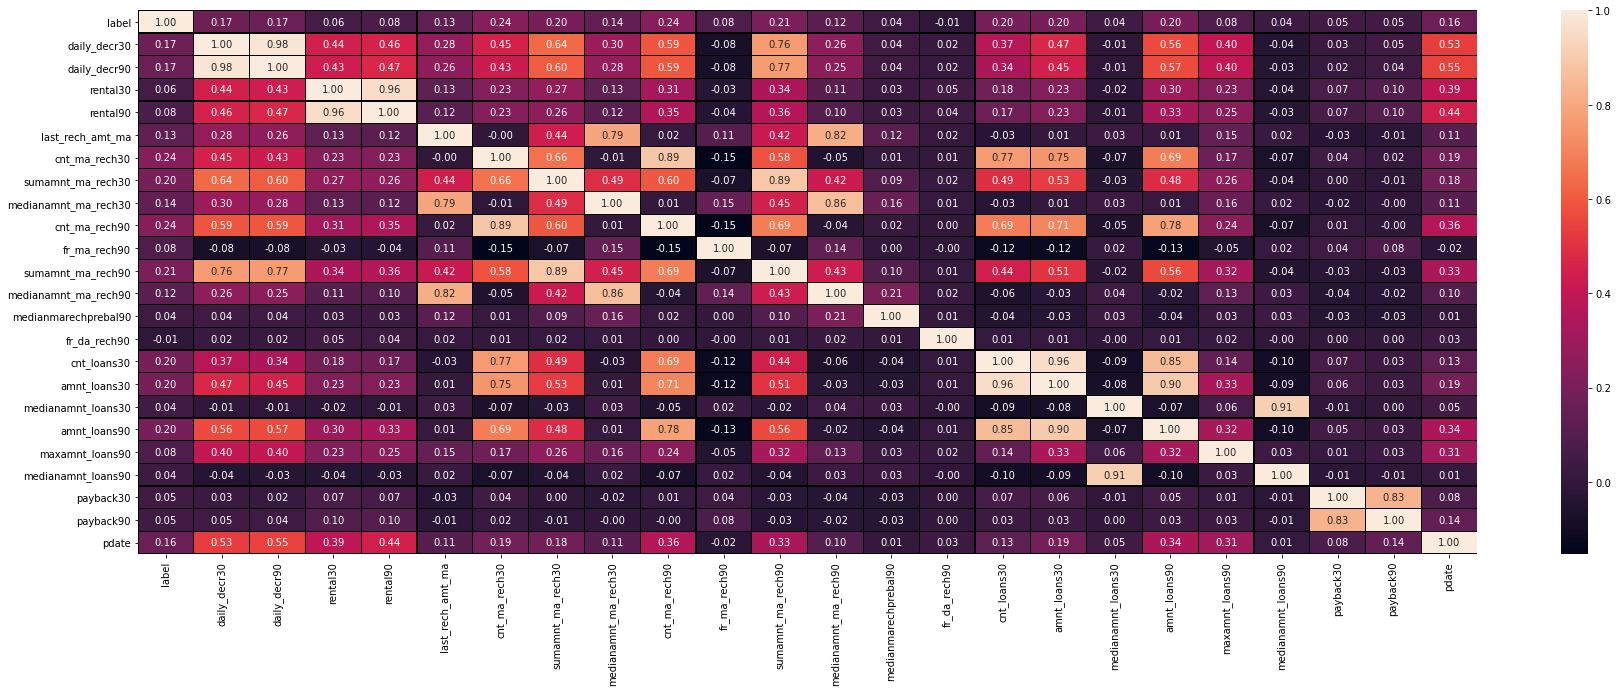

In [19]:
#heat map
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

so it gives the detail % of correlation with the label

In [20]:
data.shape

(209593, 24)

so our dataset consist of 209593 rows and 24 columns

lets will check the outliers present in our dataset by box plot

label                      AxesSubplot(0.125,0.799681;0.227941x0.0803191)
daily_decr30            AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
daily_decr90            AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
rental30                   AxesSubplot(0.125,0.703298;0.227941x0.0803191)
rental90                AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
last_rech_amt_ma        AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
cnt_ma_rech30              AxesSubplot(0.125,0.606915;0.227941x0.0803191)
sumamnt_ma_rech30       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
medianamnt_ma_rech30    AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
cnt_ma_rech90              AxesSubplot(0.125,0.510532;0.227941x0.0803191)
fr_ma_rech90            AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
sumamnt_ma_rech90       AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
medianamnt_ma_rech90       AxesSubplot(0.125,0.414149;0.227941x0.0803191)
medianmarechprebal90    AxesSubplot(0.

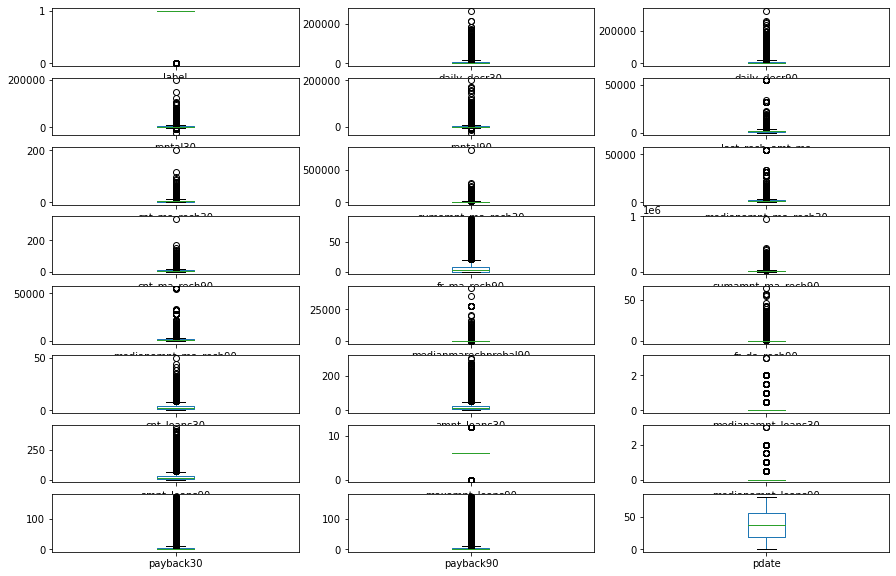

In [21]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(8,3),figsize = (15,10))

so outliers are present in our dataset lets will remove it

In [22]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[2.64789583 0.25229941 0.27634619 ... 2.9046997  2.39409346 0.52239995]
 [0.37765836 0.73103667 0.5533797  ... 0.38562959 0.41923266 1.47739785]
 [0.37765836 0.43201111 0.42903256 ... 0.38562959 0.41923266 1.88668266]
 ...
 [0.37765836 0.70079045 0.53319431 ... 0.06820893 0.04735622 0.93168476]
 [0.37765836 0.77075515 0.59455827 ... 0.38562959 0.59938541 0.7497804 ]
 [0.37765836 0.09674426 0.14174607 ... 0.38562959 0.41923266 0.06878922]]


In [23]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([     0,      0,      0, ..., 209592, 209592, 209592], dtype=int64), array([ 0,  1,  2, ..., 21, 22, 23], dtype=int64))
(209593, 24)


In [24]:
data_new=data[(z<3).all(axis = 1)]

In [25]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(209593, 24)
(169911, 24)
Shape after removing outlires (169911, 24)


lets will check skewness present in our dataset

In [26]:
data.skew()

label                   -2.089439
daily_decr30             1.960544
daily_decr90             2.074719
rental30                 2.194306
rental90                 2.242482
last_rech_amt_ma         2.125557
cnt_ma_rech30            1.173387
sumamnt_ma_rech30        1.631699
medianamnt_ma_rech30     2.325874
cnt_ma_rech90            1.318110
fr_ma_rech90             1.983354
sumamnt_ma_rech90        1.703959
medianamnt_ma_rech90     2.373303
medianmarechprebal90     3.697595
fr_da_rech90            48.498884
cnt_loans30              1.465197
amnt_loans30             1.439681
medianamnt_loans30       5.346029
amnt_loans90             1.692563
maxamnt_loans90          2.680282
medianamnt_loans90       6.104944
payback30                2.607510
payback90                2.523879
pdate                    0.249516
dtype: float64

so lets will remove the skewness present in dataset by sqrt method

In [27]:
#remove skewness
data['daily_decr30']=np.sqrt(data['daily_decr30'])
data['daily_decr90']=np.sqrt(data['daily_decr90'])
data['rental30']=np.sqrt(data['rental30'])
data['rental90']=np.sqrt(data['rental90'])
data['last_rech_amt_ma']=np.sqrt(data['last_rech_amt_ma'])
data['cnt_ma_rech30']=np.sqrt(data['cnt_ma_rech30'])
data['sumamnt_ma_rech30']=np.sqrt(data['sumamnt_ma_rech30'])
data['medianamnt_ma_rech30']=np.sqrt(data['medianamnt_ma_rech30'])
data['cnt_ma_rech90']=np.sqrt(data['cnt_ma_rech90'])
data['fr_ma_rech90']=np.sqrt(data['fr_ma_rech90'])
data['sumamnt_ma_rech90']=np.sqrt(data['sumamnt_ma_rech90'])
data['medianamnt_ma_rech90']=np.sqrt(data['medianamnt_ma_rech90'])
data['fr_da_rech90']=np.sqrt(data['fr_da_rech90'])
data['cnt_loans30']=np.sqrt(data['cnt_loans30'])
data['amnt_loans30']=np.sqrt(data['amnt_loans30'])
data['medianamnt_loans30']=np.sqrt(data['medianamnt_loans30'])
data['amnt_loans90']=np.sqrt(data['amnt_loans90'])
data['maxamnt_loans90']=np.sqrt(data['maxamnt_loans90'])
data['medianamnt_loans90']=np.sqrt(data['medianamnt_loans90'])
data['payback30']=np.sqrt(data['payback30'])
data['payback90']=np.sqrt(data['payback90'])







In [28]:
data.skew()

label                   -2.089439
daily_decr30             0.832184
daily_decr90             0.901643
rental30                 0.933124
rental90                 0.956804
last_rech_amt_ma         0.400870
cnt_ma_rech30           -0.112755
sumamnt_ma_rech30        0.169014
medianamnt_ma_rech30     0.252149
cnt_ma_rech90            0.073673
fr_ma_rech90             0.907526
sumamnt_ma_rech90        0.312670
medianamnt_ma_rech90     0.346892
medianmarechprebal90     3.697595
fr_da_rech90            44.674423
cnt_loans30              0.778962
amnt_loans30             0.753777
medianamnt_loans30       5.346029
amnt_loans90             0.956368
maxamnt_loans90          2.680282
medianamnt_loans90       6.104944
payback30                0.856873
payback90                0.770928
pdate                    0.249516
dtype: float64

In [29]:
data.shape

(169911, 24)

In [30]:
data.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,169911.000000,168125.000000,168125.000000,165630.000000,165415.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,...,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000
mean,0.861198,44.033971,45.755826,36.648939,40.760103,36.876900,1.605999,65.531634,34.357384,1.991728,...,0.000661,1.489274,3.742267,0.022415,4.141970,2.550210,0.017570,1.041932,1.203269,35.113665
std,0.345741,43.340094,45.989847,26.603732,30.327071,20.308425,0.932907,41.231903,19.783481,1.144337,...,0.028800,0.549290,1.401474,0.123884,1.764812,0.303394,0.110070,1.240773,1.328534,21.664603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.449490,2.449490,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.927338,5.944185,16.459040,17.299277,27.748874,1.000000,39.230090,27.748874,1.000000,...,0.000000,1.000000,2.449490,0.000000,2.449490,2.449490,0.000000,0.000000,0.000000,17.000000
50%,1.000000,30.680613,30.830180,30.558796,33.808875,39.230090,1.732051,67.948510,39.230090,2.000000,...,0.000000,1.414214,3.464102,0.000000,3.464102,2.449490,0.000000,0.000000,1.224745,34.000000
75%,1.000000,75.587918,77.787853,51.762631,58.180495,43.863424,2.236068,92.092345,39.331921,2.828427,...,0.000000,1.732051,4.898979,0.000000,5.477226,2.449490,0.000000,1.957890,2.121320,51.000000
max,1.000000,181.705806,197.059889,124.970036,144.203155,89.442719,4.000000,195.202459,89.442719,5.196152,...,1.414214,3.162278,8.124038,0.707107,10.099505,3.464102,0.707107,5.461990,5.932959,81.000000


In [31]:
data.isnull().sum()

label                      0
daily_decr30            1786
daily_decr90            1786
rental30                4281
rental90                4496
last_rech_amt_ma           0
cnt_ma_rech30              0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90       0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
medianamnt_loans30         0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
pdate                      0
dtype: int64

so column daily_decr30,daily_decr90,rental30,rental90 has null values in it lets will deal with it

In [32]:
data['daily_decr30']=data['daily_decr30'].fillna(data['daily_decr30'].mode()[0])
data['daily_decr90']=data['daily_decr90'].fillna(data['daily_decr90'].mode()[0])
data['rental30']=data['rental30'].fillna(data['rental30'].mode()[0])
data['rental90']=data['rental90'].fillna(data['rental90'].mode()[0])

In [33]:
data.isnull().sum()

label                   0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
medianamnt_loans30      0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

so there is no null values now

In [34]:
data.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,...,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000,169911.000000
mean,0.861198,43.571113,45.274869,35.725549,39.681553,36.876900,1.605999,65.531634,34.357384,1.991728,...,0.000661,1.489274,3.742267,0.022415,4.141970,2.550210,0.017570,1.041932,1.203269,35.113665
std,0.345741,43.344974,45.984878,26.887076,30.629935,20.308425,0.932907,41.231903,19.783481,1.144337,...,0.028800,0.549290,1.401474,0.123884,1.764812,0.303394,0.110070,1.240773,1.328534,21.664603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.449490,2.449490,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.755548,5.772059,15.297059,16.035274,27.748874,1.000000,39.230090,27.748874,1.000000,...,0.000000,1.000000,2.449490,0.000000,2.449490,2.449490,0.000000,0.000000,0.000000,17.000000
50%,1.000000,29.735501,30.000000,29.863021,32.770871,39.230090,1.732051,67.948510,39.230090,2.000000,...,0.000000,1.414214,3.464102,0.000000,3.464102,2.449490,0.000000,0.000000,1.224745,34.000000
75%,1.000000,75.073298,77.236229,50.993921,57.290532,43.863424,2.236068,92.092345,39.331921,2.828427,...,0.000000,1.732051,4.898979,0.000000,5.477226,2.449490,0.000000,1.957890,2.121320,51.000000
max,1.000000,181.705806,197.059889,124.970036,144.203155,89.442719,4.000000,195.202459,89.442719,5.196152,...,1.414214,3.162278,8.124038,0.707107,10.099505,3.464102,0.707107,5.461990,5.932959,81.000000


label                      AxesSubplot(0.125,0.799681;0.227941x0.0803191)
daily_decr30            AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
daily_decr90            AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
rental30                   AxesSubplot(0.125,0.703298;0.227941x0.0803191)
rental90                AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
last_rech_amt_ma        AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
cnt_ma_rech30              AxesSubplot(0.125,0.606915;0.227941x0.0803191)
sumamnt_ma_rech30       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
medianamnt_ma_rech30    AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
cnt_ma_rech90              AxesSubplot(0.125,0.510532;0.227941x0.0803191)
fr_ma_rech90            AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
sumamnt_ma_rech90       AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
medianamnt_ma_rech90       AxesSubplot(0.125,0.414149;0.227941x0.0803191)
medianmarechprebal90    AxesSubplot(0.

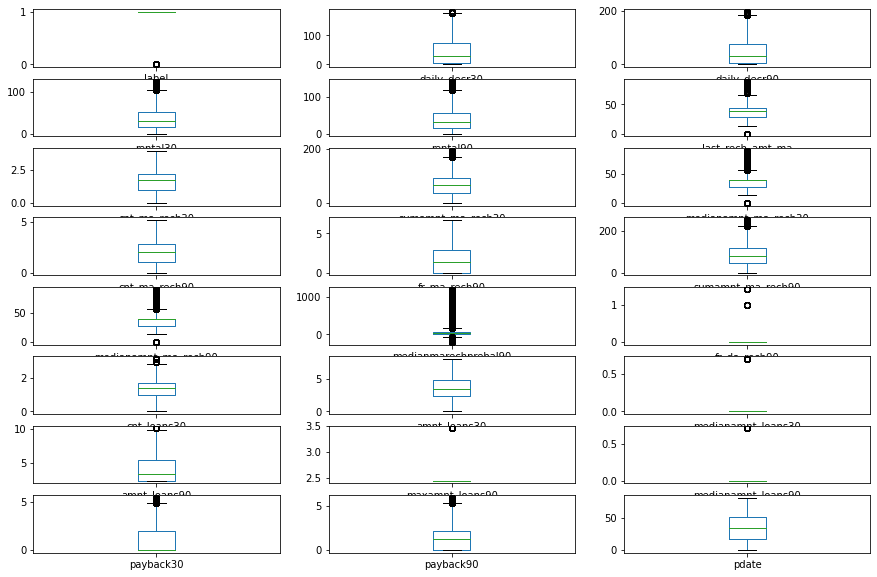

In [35]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(8,3),figsize = (15,10))

now will plot histogram to check the data distribution

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>],
       [<AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>],
       [<AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:title={'center':'fr_da_rech90'}>],
       [<AxesSubplot:title={'center':'cnt_loans30'}>,
        <AxesSubplot:title={'center':'amnt_loans30'}>,
        <AxesSubplot:title={'center'

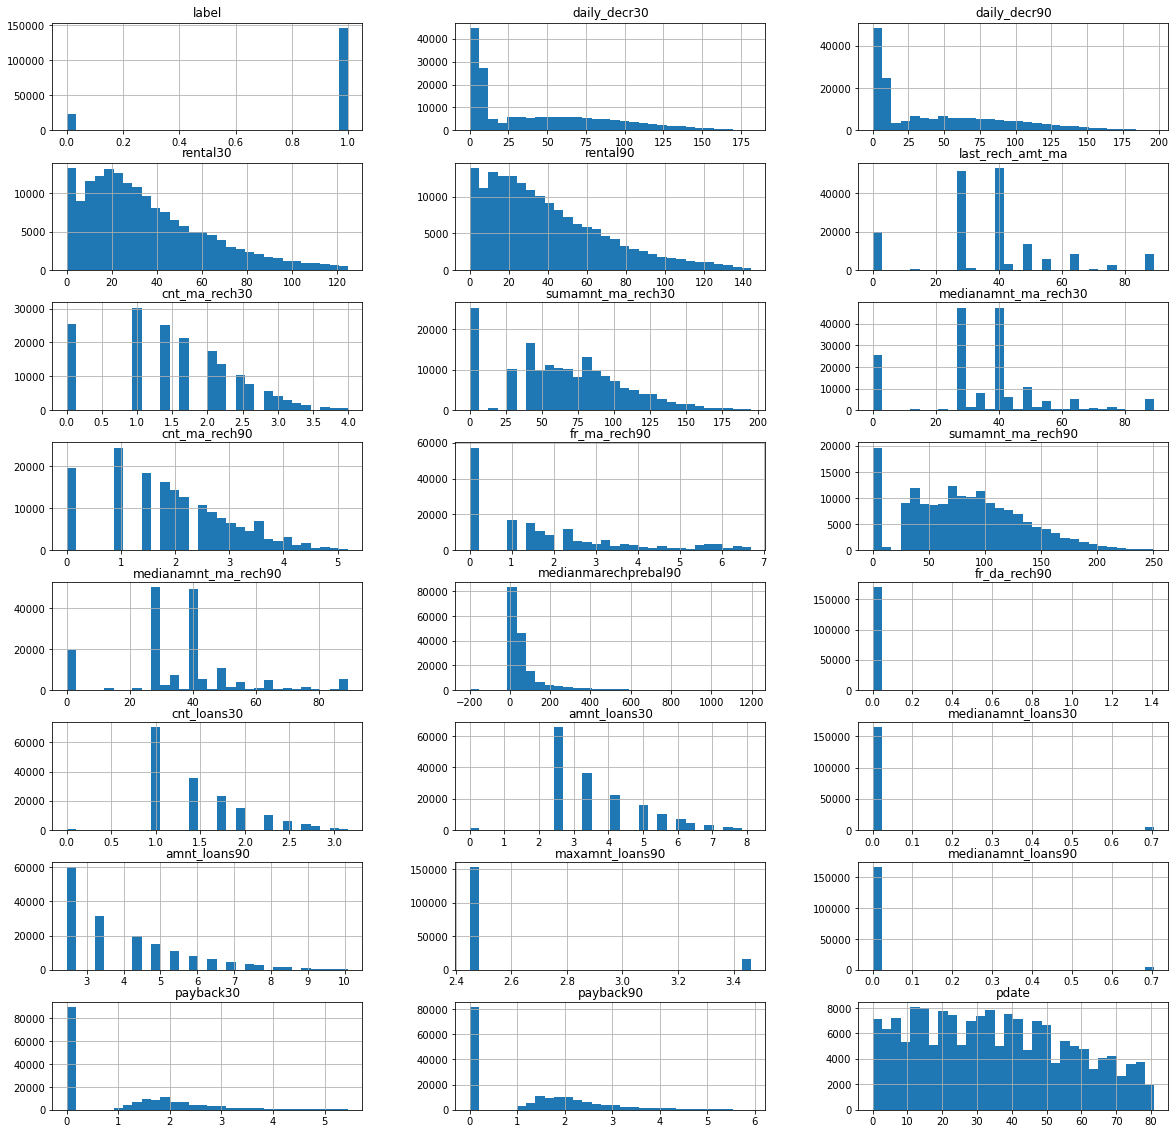

In [36]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (8,3), bins = 30)

we can also check the how sata is distributed with respective output variables

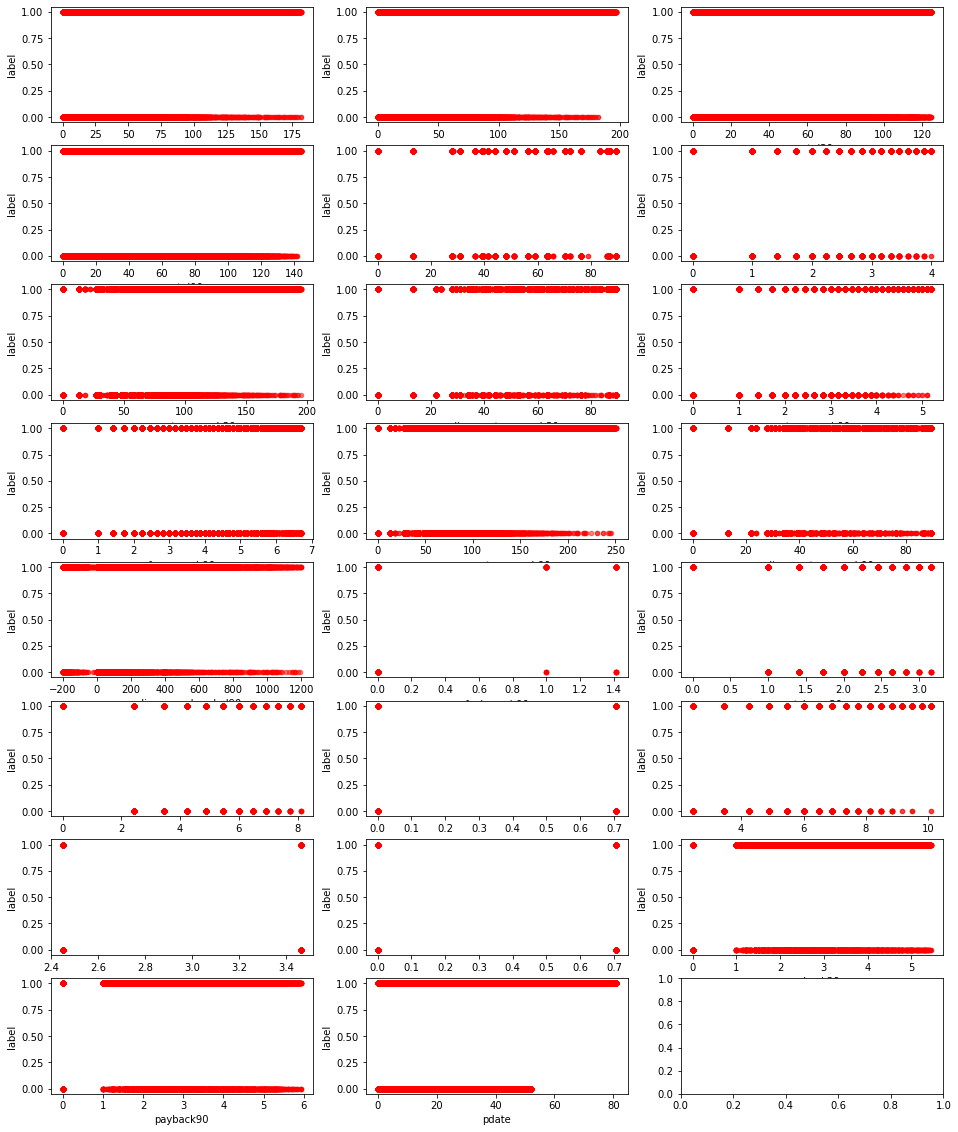

In [37]:
# setup figure
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='label', ax=ax, alpha=0.5, color='r')


now lets devide dataset into x and y variable

In [38]:
#devide data set into feature and label
y=data['label']
x=data.drop(['label'],axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [40]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.26996045,  0.2193973 , -0.77690976, ...,  3.50043557,
         3.14776031,  0.6409707 ],
       [ 1.53487317,  1.40998014,  0.93094037, ..., -0.83974649,
        -0.90571444,  1.61029666],
       [-0.1426069 , -0.17147058, -0.21286805, ..., -0.83974649,
        -0.90571444,  2.02572207],
       ...,
       [ 1.50548344,  1.38811669,  1.51883972, ...,  0.77215666,
         0.56801163,  1.05639611],
       [ 1.57295814,  1.45397421, -0.57395603, ..., -0.83974649,
         1.53334915,  0.87176259],
       [ 0.54058534,  0.47985924, -0.51055785, ..., -0.83974649,
        -0.90571444,  0.04091177]])

# Model Building

now we will building model 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=40)

In [46]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
preddt=log_reg.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8673827214988107
[[  848  4897]
 [  511 34523]]
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      5745
           1       0.88      0.99      0.93     35034

    accuracy                           0.87     40779
   macro avg       0.75      0.57      0.58     40779
weighted avg       0.84      0.87      0.83     40779



we got 86.73% accuracy from logistic regression mode

In [47]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8789818288825131
[[ 3391  2354]
 [ 2581 32453]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      5745
           1       0.93      0.93      0.93     35034

    accuracy                           0.88     40779
   macro avg       0.75      0.76      0.75     40779
weighted avg       0.88      0.88      0.88     40779



we got 87.93% accuracy from DecisionTreeClassifier model

In [48]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9144167341033375
[[ 3173  2572]
 [  918 34116]]
              precision    recall  f1-score   support

           0       0.78      0.55      0.65      5745
           1       0.93      0.97      0.95     35034

    accuracy                           0.91     40779
   macro avg       0.85      0.76      0.80     40779
weighted avg       0.91      0.91      0.91     40779



we got 91.39% accuracy from randomforestclassifier

In [49]:
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8970793790921798
[[ 2895  2850]
 [ 1347 33687]]
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      5745
           1       0.92      0.96      0.94     35034

    accuracy                           0.90     40779
   macro avg       0.80      0.73      0.76     40779
weighted avg       0.89      0.90      0.89     40779



we got 89.70 % accuracy from KNeighborsclassifier 

so from above four model we got maximum accuracy with randomforestclassifier i.e 91.39%
we can also check it with the AUC-ROC Curve

# AUC-ROC curve

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

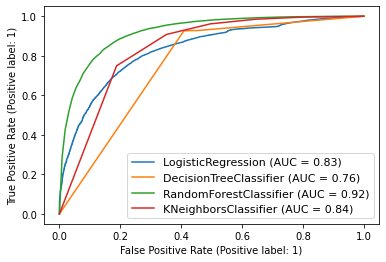

In [51]:
disp=plot_roc_curve(log_reg,x_test,y_test)
disp=plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

so from AUC-ROC curve it is seen that maximum accuracy is for RandomForestClassifier i.e 92%

so lets will select RandomForestClassifier 

In [52]:
rf=RandomForestClassifier()

In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier()

we can also cross validate the model

# cross validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
for i in range(2,10):
    cv=cross_val_score(rf,x,y,cv=i)
    print(rf,cv.mean())

RandomForestClassifier() 0.9141432887163221
RandomForestClassifier() 0.9145081836961704
RandomForestClassifier() 0.9147141756487503
RandomForestClassifier() 0.9149672469237558
RandomForestClassifier() 0.9148377719301782
RandomForestClassifier() 0.9149554766907381
RandomForestClassifier() 0.9150849588538137
RandomForestClassifier() 0.9152674047001076


we can predict the output as

In [56]:
#lets plot and visualize
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

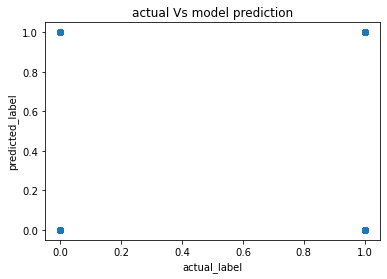

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_label')
plt.ylabel('predicted_label')
plt.title('actual Vs model prediction')
plt.show()

this is the visualization of actual vs predicted label values 

# saving model

In [58]:
#saving model
import joblib
joblib.dump(rf,'Micro_credit_defaulter_project')

['Micro_credit_defaulter_project']

# conclusion

In [59]:
loaded_model=joblib.load('Micro_credit_defaulter_project')
result=loaded_model.score(x_test,y_test)
print(result)

0.9141715098457539


so in this we have devoloped model ,saved it and also drawn a conclusion with model accuracy score of 91.41%